In [1]:
import dill
dill.load_session('C:/Users/ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')

In [155]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [156]:
from scipy.stats import norm
g_m = norm(*norm.fit(data_train[data_train['label']==0]['meanfun']))
g_f = norm(*norm.fit(data_train[data_train['label']==1]['meanfun']))

In [157]:
def max_ind(mu_1,mu_2,sigma_1,sigma_2):
    a = 1.0/(2*sigma_1**2) - 1.0/(2*sigma_2**2)
    b = mu_2/(sigma_2**2) - mu_1/(sigma_1**2)
    c = mu_1**2 /(2*sigma_1**2) - mu_2**2 / (2*sigma_2**2) - np.log(sigma_2/sigma_1)
    return np.roots([a,b,c])
solutions = max_ind(g_m.mean(),g_f.mean(),g_m.std(), g_f.std())
print(solutions)

[-0.48590267  0.14228058]


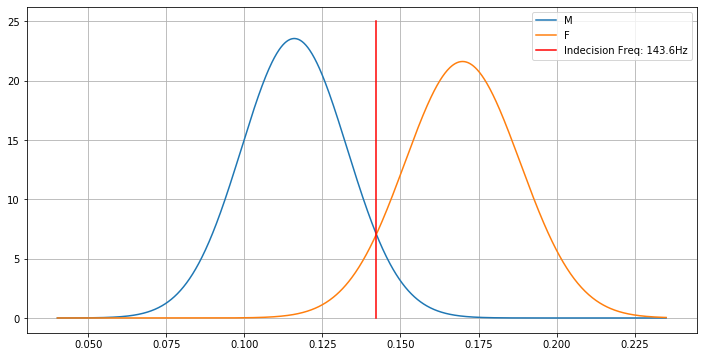

In [158]:
from matplotlib import pyplot as plt

x = np.linspace(g_f.ppf(0.000000000001), g_m.ppf(0.999999999999),1000)
plt.figure(figsize=(12,6))
plt.plot(x,g_m.pdf(x))
plt.plot(x,g_f.pdf(x))
plt.plot([solutions[1],solutions[1]],[0,25],'r')
plt.legend(['M','F',"Indecision Freq: {:0.1f}Hz".format(solutions[1]*1009)])
plt.grid()
plt.show()

In [159]:
prob_m=g_m.pdf(data_test["meanfun"])
prob_f=g_f.pdf(data_test["meanfun"])
pred_m=prob_m>=prob_f
pred_f=prob_f>prob_m

In [3]:
male_gt = data_test['label']==0
cm = confusion_matrix(male_gt, pred_m)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("\nClassification Report\n",classification_report(male_gt, pred_m))

False Positive Rate: 0.06
True Positive Rate: 0.96

Classification Report
               precision    recall  f1-score   support

       False       0.96      0.94      0.95       401
        True       0.94      0.96      0.95       391

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [161]:
female_gt = data_test['label']==1
cm = confusion_matrix(female_gt, pred_f)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("\nClassification Report\n",classification_report(female_gt, pred_f))

False Positive Rate: 0.04
True Positive Rate: 0.94

Classification Report
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       391
        True       0.96      0.94      0.95       401

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



--------------------------------------------------------------------------------
<h1>Mahalanobis<h1>


In [162]:
dist_m = (data_test.meanfun-g_m.mean())/g_m.std()
dist_f = (data_test.meanfun-g_f.mean())/g_f.std()
pred_m=np.abs(dist_m)<np.abs(dist_f)
pred_f=np.abs(dist_f)<np.abs(dist_m)

In [163]:
cm = confusion_matrix(male_gt, pred_m)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("Classification Report\n",classification_report(male_gt,pred_m))

False Positive Rate: 0.06
True Positive Rate: 0.96
Classification Report
               precision    recall  f1-score   support

       False       0.96      0.94      0.95       401
        True       0.94      0.96      0.95       391

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [164]:
cm = confusion_matrix(female_gt, pred_f)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("Classification Report\n",classification_report(female_gt,pred_f))

False Positive Rate: 0.04
True Positive Rate: 0.94
Classification Report
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       391
        True       0.96      0.94      0.95       401

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



------------------------------------------------------------------------------------
<h1>Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(priors=[0.5,0.5])
dc=np.array(data_train.columns)
model.fit(data_train[dc[0:dc.size-1]],data_train['label'])
pred=model.predict(data_test[dc[0:dc.size-1]])
print("Classification Report\n",classification_report(data_test.label,pred))

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       391
           1       0.90      0.85      0.87       401

    accuracy                           0.88       792
   macro avg       0.88      0.88      0.87       792
weighted avg       0.88      0.88      0.87       792



In [21]:
model.fit(data_train[["IQR","skew","sfm","meanfun","minfun","modindx"]],data_train['label'])
pred=model.predict(data_test[["IQR","skew","sfm","meanfun","minfun","modindx"]])
print("Classification Report\n",classification_report(data_test.label,pred))

Classification Report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       391
           1       0.96      0.95      0.95       401

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [22]:
model.fit(data_train[["meanfun","IQR"]],data_train['label'])
pred=model.predict(data_test[["meanfun","IQR"]])
print("Classification Report\n",classification_report(data_test.label,pred))

Classification Report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       391
           1       0.96      0.96      0.96       401

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



<h1> Map and Naive Bayes without outliers

<h1> Map

In [10]:
g_m = norm(*norm.fit(data_clean_train[data_clean_train['label']==0]['meanfun']))
g_f = norm(*norm.fit(data_clean_train[data_clean_train['label']==1]['meanfun']))
prob_m=g_m.pdf(data_clean_test["meanfun"])
prob_f=g_f.pdf(data_clean_test["meanfun"])
pred_m=prob_m>=prob_f
pred_f=prob_f>prob_m

In [11]:
male_gt = data_clean_test['label']==0
cm = confusion_matrix(male_gt, pred_m)
cm=cm/cm.sum(1).reshape(-1,1)
_, fpr, _, tpr = cm.ravel()
print("False Positive Rate: {:0.2f}".format(fpr))
print("True Positive Rate: {:0.2f}".format(tpr))
print("\nClassification Report\n",classification_report(male_gt, pred_m))

False Positive Rate: 0.05
True Positive Rate: 0.97

Classification Report
               precision    recall  f1-score   support

       False       0.97      0.95      0.96       350
        True       0.96      0.97      0.96       382

    accuracy                           0.96       732
   macro avg       0.96      0.96      0.96       732
weighted avg       0.96      0.96      0.96       732



<h1> Naive

In [11]:
model = GaussianNB(priors=[0.5,0.5])
dc=np.array(data_clean_train.columns)
model.fit(data_clean_train[dc[0:dc.size-1]],data_clean_train['label'])
pred=model.predict(data_clean_test[dc[0:dc.size-1]])
print("\nClassification Report\n",classification_report(data_clean_test.label, pred))


Classification Report
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       382
           1       0.92      0.93      0.93       350

    accuracy                           0.93       732
   macro avg       0.93      0.93      0.93       732
weighted avg       0.93      0.93      0.93       732



In [29]:
model.fit(data_clean_train[["IQR","skew","sfm","meanfun","minfun","modindx"]],data_clean_train['label'])
pred=model.predict(data_clean_test[["IQR","skew","sfm","meanfun","minfun","modindx"]])
print("\nClassification Report\n",classification_report(data_clean_test.label, pred))


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       382
           1       0.97      0.97      0.97       350

    accuracy                           0.97       732
   macro avg       0.97      0.97      0.97       732
weighted avg       0.97      0.97      0.97       732



In [12]:
clean_gauss.fit(data_clean_train[["IQR","meanfun"]],data_clean_train['label'])
pred=clean_gauss.predict(data_clean_test[["IQR","meanfun"]])
print("\nClassification Report\n",classification_report(data_clean_test.label, pred))


Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       382
           1       0.98      0.97      0.98       350

    accuracy                           0.98       732
   macro avg       0.98      0.98      0.98       732
weighted avg       0.98      0.98      0.98       732



<h1>-----------------------------------------------------------------------------------------------------------------------------------PCA

In [9]:
pca_gauss=GaussianNB(priors=[0.5,0.5])
pca_gauss.fit(pca_train[["n3","n4"]],pca_train['label'])
pred=pca_gauss.predict(pca_test[["n3","n4"]])
print("\nClassification Report\n",classification_report(data_clean_test.label, pred))


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       382
           1       0.98      0.97      0.97       350

    accuracy                           0.98       732
   macro avg       0.98      0.98      0.98       732
weighted avg       0.98      0.98      0.98       732



In [13]:
dill.dump_session('C:/Users/ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')